# Practice Linear Regression

### pandas, numpy and matplotlib

Excerpted and modified from Python Machine Learning (Sebastian Raschka, 2019)

In [18]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#root = 'Exercise1/'

Let's start practicing python by playing with some data. We will load a dataset (Iris) using the data handling package, pandas. We can then look at the information about the data by print it out (or by df.head(), df.tail())
And let’s practice some basic data processing using slicing and plot the data using matplotlib, the plotting package

In [2]:
df = pd.read_csv('iris.csv', header=0, encoding='utf-8')
df.head()

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# Variables
X = df.iloc[0:150, 0].values#df['petal.width'].values
y = df.iloc[0:150, 2].values#df['petal.width'].values

Let's practice some basic data processing using slicing and plot the data using matplotlib, the plotting package
And try to do a simple linear regression by using the LinearRegression model from sklearn, the module for python machine learning. We will start with a simple single variable regression, where X (feature) = petal.width and Y (target) = petal.length

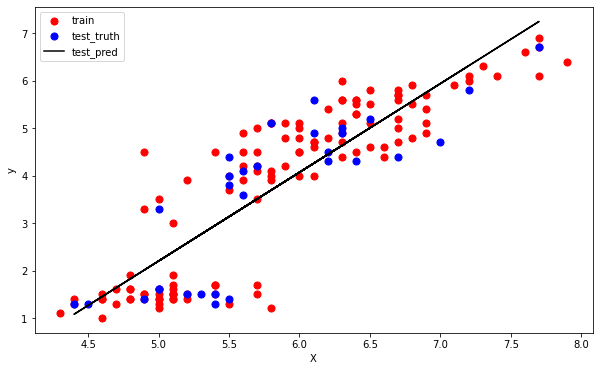

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=101)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(np.expand_dims(X_train, 1), y_train)

# Making Predictions
pred = lr.predict(np.expand_dims(X_test, 1))

# Let's define a model to plot the Result
def plot_regression(X_train, y_train, X_test, y_test, pred, color):
    plt.figure(figsize=(10, 6))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.scatter(X_train, y_train, color='red', marker='o', label='train', s=50)
    plt.scatter(X_test, y_test, color='blue', marker='o', label='test_truth', s=50)
    plt.plot(X_test, pred, color=color, label='test_pred')
    plt.legend()
    plt.show()

plot_regression(X_train, y_train, X_test, y_test, pred, color='black')


In the previous section we use the .predict method of the regression model (lr) to get the testing prediction (pred). The linear regression model can be written as pred = a * X + b. Can you calculate the pred value explicitly?

found slope: [1.86925562]
found intercept: -7.146555833513899


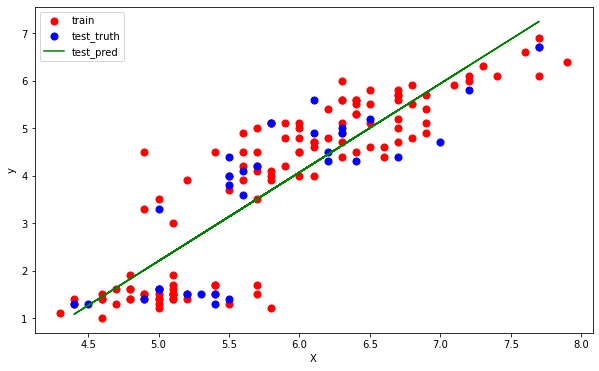

In [4]:
a = lr.coef_
b = lr.intercept_
print('found slope: ' + str(a))
print('found intercept: ' + str(b))

# ====================== YOUR CODE HERE =====================
pred_manually = [a * x + b for x in X_test]
# ====================== YOUR CODE HERE =====================

plot_regression(X_train, y_train, X_test, y_test, pred_manually, color='green')

### Optimize a Linear Regression Model
Previously, we utilized the linear regression model in scikit-learn (from sklearn.linear_model import LinearRegression) directly. Although you can call most of the machine learning model from python packages, it is important to know how them work behind the scene and code it up yourself once in a while (that's why we have a course!). Now Let's try to do a simple linear regression by hand. The first step is to provide a lost function.

Remember the objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Now, we are doing a simple one variable regression, so the only feature $(x_1)$ should just be X, while we have two parameters, $\theta_0$ for the intercept and $\theta_1$ for the slope. We put them together in a array (theta = [$\theta_0$, $\theta_1$]), so $\theta_0$ = theta[0] and $\theta_1$ = theta[1]

In [5]:
def regression_lost_function(X, y, theta):
    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    loss = None

    # ====================== YOUR CODE HERE =====================
    # HINT: FIRSTS TIME THE FEATURE X WITH THETA1, THEN PLUS THETA0. THE SQUARE ERROR SHOULD BE THE DIFFERENCE BETWEEN PREDICTION AND THE TARGET Y, TAKE NP.SQUARE, AND TAKE THE AVERAGE (NP,SUM) THEN OVER 2 * M
    # ===========================================================
    return loss

In [6]:
J = regression_lost_function(X_train, y_train, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 8.82\n')

# further testing of the cost function
J = regression_lost_function(X_train, y_train, theta=np.array([1.86, -7.14]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 2.89')

With theta = [0, 0] 
Cost computed = 8.83
Expected cost value (approximately) 8.82

With theta = [-1, 2]
Cost computed = 987.00
Expected cost value (approximately) 2.89


model 0:


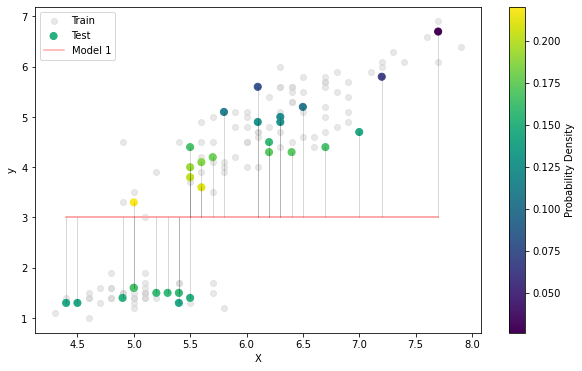

  Sum of Mean Square Error: 3.0133
  Sum of -Log Probability: 59.1371
Model 1:


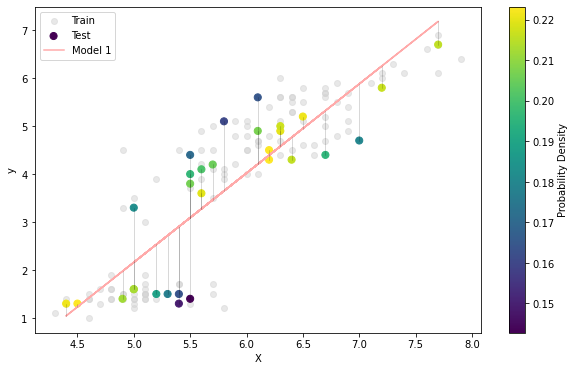

  Sum of Mean Square Error: 0.8148
  Sum of -Log Probability: 48.7913


In [13]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.colors as mcolors

def calculate_probabilities(predictions, actual, std_dev):
    return norm.pdf(actual - predictions, loc=0, scale=std_dev)

def plot_regression_probability(X_test, y_test, y_test_pred_list, mode='single', probs=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='lightgray', alpha=0.5, label='Train')
    if mode == 'single':
        scatter = plt.scatter(X_test, y_test, c=probs, cmap='viridis', label='Test', s=50)
    else:
        scatter = plt.scatter(X_test, y_test)

    # Create a color map from light to dark red
    num_lines = len(y_test_pred_list)
    red_cmap = mcolors.LinearSegmentedColormap.from_list("", ["#FFAAAA","#AA0000"])
    red_colors = red_cmap(np.linspace(0, 1, num_lines))

    # Plot each regression line with a different shade of red
    for i, y_test_pred in enumerate(y_test_pred_list):
        plt.plot(X_test, y_test_pred, color=red_colors[i], label=f'Model {i+1}')

        # Add vertical lines between y_test and y_pred
        if mode == 'single':
            for j in range(len(X_test)):
                plt.plot([X_test[j], X_test[j]], [y_test[j], y_test_pred[j]], 'k-', lw=0.5, alpha=0.3)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Probability Density')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Calculate and print metrics for each model
    for i, y_test_pred in enumerate(y_test_pred_list):
        # Calculate sum of mean square error
        mse = np.mean((y_test - y_test_pred) ** 2)

        # Calculate sum of log probability
        model_probs = calculate_probabilities(y_test_pred, y_test, std_dev)
        log_prob = np.sum(np.log(model_probs))

    if mode == 'single':
        print(f"  Sum of Mean Square Error: {mse:.4f}")
        print(f"  Sum of -Log Probability: {-1 * log_prob:.4f}")

# Line with coefficients [0, 1]
X_range = np.array([min(X), max(X)])
y_test_pred_0 = 0 * X_test + 3

# Line with coefficients [1.86, -7.14]
X_range = np.array([min(X), max(X)])
y_test_pred_1 = 1.86 * X_test - 7.14

variance = np.var(y_train)
std_dev = np.sqrt(variance)

print('model 0:')
probs = calculate_probabilities(y_test_pred_0, y_test, std_dev)
plot_regression_probability(X_test, y_test, [y_test_pred_0], probs=probs)

print('Model 1:')
probs = calculate_probabilities(y_test_pred_1, y_test, std_dev)
plot_regression_probability(X_test, y_test, [y_test_pred_1], probs=probs)

In [14]:
def gradientDescent(X, y, theta, learning_rate, num_iters):
    """
    Peform a single gradient step on the parameter vector theta.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    loss_history = [] # Use a python list to save cost in every iteration
    theta_history = []

    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        # HINT: USE NP.MULTIPLY FOR ELEMENT-WISE MULTIPLICATION
        # FIRST YOU WANT TO CALCULATE THE VALUE OF PREDICTION, h =  (X*θ_1 + θ_0),
        # THEN THE DIFFERENCE h BETWEEN PREDICTION AND TARGET, diff = h - y
        # THEN ∂loss/∂θ_1 = 2 * X * (h - y)
        # THEN ∂loss/∂θ_0 = 2 * (h - y)
        # THEN ∂θ_1(NEW) = ∂θ_1(OLD) - learning / 2m * ∂loss/∂θ_1
        # THEN ∂θ_0(NEW) = ∂θ_0(OLD) - learning / 2m * ∂loss/∂θ_0
        # =====================================================================

        # save the cost J in every iteration
        loss_history.append(regression_lost_function(X, y, theta))
        theta_history.append(theta.copy())

    theta_history = np.stack(theta_history, 1)
    return theta, loss_history, theta_history

Now let's use gradient descent to optimize the linear regression function. We will start theta with two zeros (theta = np.zeros(2)) and optimize the value from there. Does your result match the one we have ealier using scikit-learn?

Theta found by gradient descent: -7.0121, 1.8467
Expected theta values (approximately): [1.1286, 2.1856]


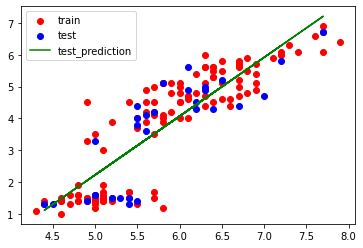

In [15]:
import numpy as np
# initialize fitting parameters
theta = [0, 3]

# some gradient descent settings
iterations = 4000
learning_rate = 0.05

theta, loss_history, theta_history = gradientDescent(X_train ,y_train, theta, learning_rate, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [1.1286, 2.1856]')

plt.scatter(X_train, y_train, color='red', marker='o', label='train')
plt.scatter(X_test, y_test, color='blue', marker='o', label='test')
plt.plot(X_test, np.dot(X_test, theta[1]) + theta[0], color='green', label='test_prediction')
plt.legend()#['Training data', 'Linear regression']);
plt.show()

Let's plot the parameters over the optimization step. What will happen if you change the learning rate earlier?

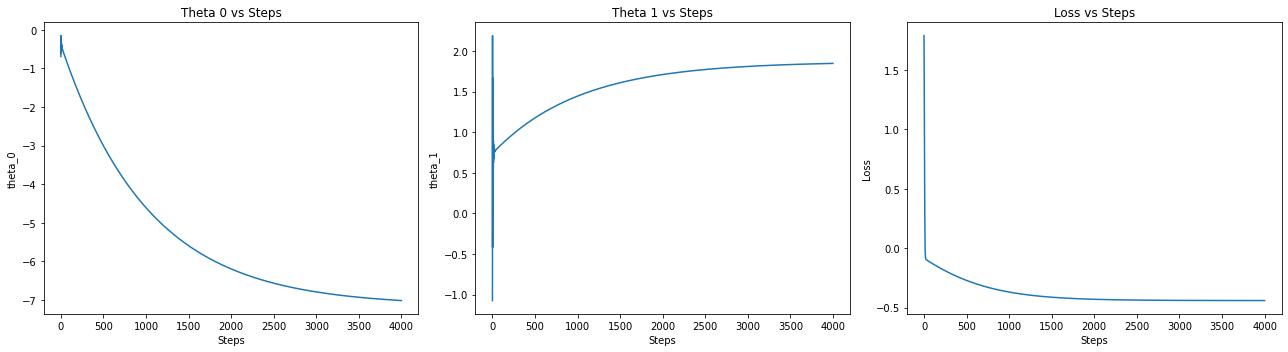

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

steps = np.linspace(0, iterations, iterations)

# Plot theta_0
ax1.plot(steps, theta_history[0,:])
ax1.set_xlabel('Steps')
ax1.set_ylabel('theta_0')
ax1.set_title('Theta 0 vs Steps')

# Plot theta_1
ax2.plot(steps, theta_history[1,:])
ax2.set_xlabel('Steps')
ax2.set_ylabel('theta_1')
ax2.set_title('Theta 1 vs Steps')

# Plot loss history
ax3.plot(steps, np.log10(loss_history))
ax3.set_xlabel('Steps')
ax3.set_ylabel('Loss')
ax3.set_title('Loss vs Steps')

plt.tight_layout()
plt.show()

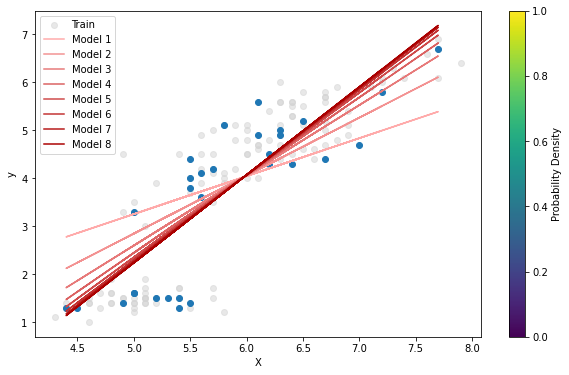

In [17]:
y_test_pred_all = []
for i in range(50, 4000, 500):
    y_test_pred_all.append(theta_history[1, i] * X_test + theta_history[0, i])
plot_regression_probability(X_test, y_test, y_test_pred_all, mode='multiple')